# Homework 3 Adan Constanzo

## Question 1: Predicting Heart Disease

Importing required packages and libraries.

In [8]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


### a- Reading the dataset file "Hearts_s.csv" and assign it to a Pandas DataFrame.

In [9]:
hearts_df = pd.read_csv("Heart_s.csv")

### c- building feature matrix and label vector.

In [10]:
feature_cols = ['Age', 'RestBP', 'Chol', 'RestECG', 'MaxHR', 'Oldpeak']

X = hearts_df[feature_cols]

X.head()

,Age,RestBP,Chol,RestECG,MaxHR,Oldpeak
0,63,145,233,2,150,2.3
1,67,160,286,2,108,1.5
2,67,120,229,2,129,2.6
3,37,130,250,0,187,3.5
4,41,130,204,2,172,1.4


In [11]:
print(X.shape)

(301, 6)


### d- Split the dataset into testing and training set with the following parameters: test_size = 0.25, random_state=4

In [12]:
from sklearn.model_selection import train_test_split

y = hearts_df["AHD"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

### e- using KNN (with k =3), Decision Tree (with random_state=5) and Logistic Regression

In [13]:
def getAccuracy(classifiers, accuracy):
    for x in range(len(classifiers)):
        classifiers[x].fit(X_train, y_train)
        y_predict = classifiers[x].predict(X_test)
        accuracy[x].append(accuracy_score(y_test, y_predict))
    return accuracy

In [14]:
# instantiating a knn object with k = 3
knn = KNeighborsClassifier(n_neighbors=3)
my_decisiontree = DecisionTreeClassifier(random_state=5)
my_logreg = LogisticRegression()


classifiers = [knn, my_decisiontree, my_logreg]
accuracy = [["knn"], ["decision tree"], ["logistic"]]


print(getAccuracy(classifiers, accuracy))

[['knn', 0.6973684210526315], ['decision tree', 0.6052631578947368], ['logistic', 0.7236842105263158]]


Logistic classifier is the best and knn is the worst

### f- using OneHotEncoding with pd

In [15]:

catergorical_encoded_hearts_df = pd.read_csv("Heart_s.csv")

categorical_features = ['Gender', 'ChestPain', 'Thal']

for x in range(len(categorical_features)):
    catergorical_encoded_hearts_df = pd.concat([catergorical_encoded_hearts_df, pd.get_dummies(catergorical_encoded_hearts_df[categorical_features[x]])], axis=1)
    catergorical_encoded_hearts_df.drop([categorical_features[x]], axis=1, inplace=True)

catergorical_encoded_hearts_df.head()


,Age,RestBP,Chol,RestECG,MaxHR,Oldpeak,AHD,f,m,asymptomatic,nonanginal,nontypical,typical,fixed,normal,reversable
0,63,145,233,2,150,2.3,No,1,0,0,0,0,1,1,0,0
1,67,160,286,2,108,1.5,Yes,1,0,1,0,0,0,0,1,0
2,67,120,229,2,129,2.6,Yes,1,0,1,0,0,0,0,0,1
3,37,130,250,0,187,3.5,No,1,0,0,1,0,0,0,1,0
4,41,130,204,2,172,1.4,No,0,1,0,0,1,0,0,1,0


### g- repeating parts (d) and (e) with new dataset from (f)

In [16]:
feature_cols = list(catergorical_encoded_hearts_df.columns)
feature_cols.remove('AHD')
X = catergorical_encoded_hearts_df[feature_cols]

y = catergorical_encoded_hearts_df["AHD"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

In [17]:
knn = KNeighborsClassifier(n_neighbors=3)
my_decisiontree = DecisionTreeClassifier(random_state=5)
my_logreg = LogisticRegression()


classifiers = [knn, my_decisiontree, my_logreg]
accuracy = [["knn"], ["decision tree"], ["logistic"]]


print("Old Results")
print("[['knn', 0.6973684210526315], ['decision tree', 0.6052631578947368], ['logistic', 0.7236842105263158]]")
print("New Results")
print(getAccuracy(classifiers, accuracy))

Old Results
[['knn', 0.6973684210526315], ['decision tree', 0.6052631578947368], ['logistic', 0.7236842105263158]]
New Results
[['knn', 0.6973684210526315], ['decision tree', 0.6710526315789473], ['logistic', 0.8026315789473685]]


For KNN classifier there were no imporvements with adding our categorical features.
There was a bump of accuracy using a decision tree classifier and a logistic classifier. 
The better classifier for this task is still logistic and the lowest is still knn.

### h- Use Cross-Validation to split the dataset using 10-fold- Cross-Validation and then report final prediction accuracy.

In [18]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=3)
my_decisiontree = DecisionTreeClassifier(random_state=5)
my_logreg = LogisticRegression()


classifiers = [knn, my_decisiontree, my_logreg]
accuracy = ["knn", "decision tree", "logistic"]

In [19]:
accuracy_list = { accuracy[x]: cross_val_score(classifiers[x], X, y, cv=10, scoring='accuracy') for x in range(len(classifiers)) }


In [20]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

def PlotResults(results, classifier):
    plt.title('Mean of %s: %f' % (classifier, results.mean()))
    plt.xlabel("$%s$"%classifier,fontsize=18)
    plt.ylabel("$Accuracy$", fontsize=18)
    y = accuracy_list[classifier]
    x = list(range(1,11))
    plt.scatter(x, y)
    for i, txt in enumerate(y):
        plt.annotate("%.2f" % txt, (x[i], y[i]))
    

knn accuracy list
[0.70967742 0.64516129 0.51612903 0.66666667 0.63333333 0.46666667
 0.66666667 0.66666667 0.55172414 0.72413793]
decision tree accuracy list
[0.77419355 0.77419355 0.77419355 0.76666667 0.8        0.63333333
 0.63333333 0.63333333 0.68965517 0.82758621]
logistic accuracy list
[0.77419355 0.80645161 0.83870968 0.93333333 0.9        0.66666667
 0.8        0.83333333 0.79310345 0.79310345]


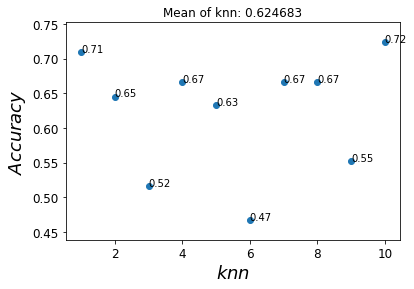

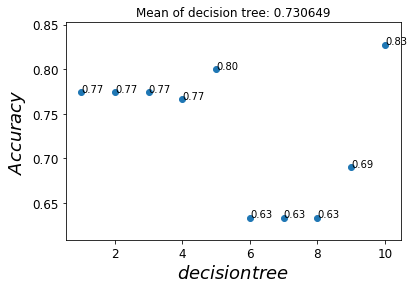

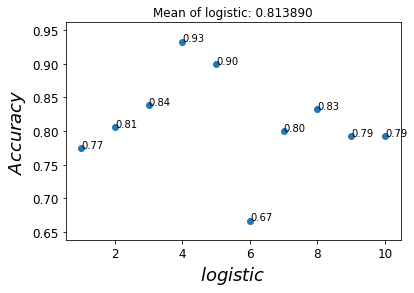

In [21]:
for i in range(len(accuracy_list)):
    plt.figure(i+1)
    print("%s accuracy list" %accuracy[i])
    print(accuracy_list[accuracy[i]])
    PlotResults(accuracy_list[accuracy[i]], accuracy[i])

## Question 2: Debt Prediction

### a- Reading "Credit.csv" to a pandas dataframe.

In [22]:
credit = pd.read_csv("Credit.csv")

### c- Generating feature matrix and target vector and normalizing the features.

In [23]:
feature_cols = ["Income", "Limit", "Rating", "Cards", "Age", "Education", "Married"]
X = credit[feature_cols]

X.head()

,Income,Limit,Rating,Cards,Age,Education,Married
0,14.891,3606,283,2,34,11,1
1,106.025,6645,483,3,82,15,1
2,104.593,7075,514,4,71,11,0
3,148.924,9504,681,3,36,11,0
4,55.882,4897,357,2,68,16,1


In [70]:
y = credit["Balance"]

In [75]:
from sklearn.preprocessing import scale

d = { x: list(scale(X[x])) for x in feature_cols if x != "Married" }
d["Married"] = list(X["Married"])

normalized_x = pd.DataFrame(data=d)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [76]:
normalized_x.head()


,Income,Limit,Rating,Cards,Age,Education,Married
0,-0.861583,-0.489999,-0.465539,-0.699130,-1.257674,-0.784930,1
1,1.727437,0.828261,0.828703,0.031032,1.528451,0.496588,1
2,1.686756,1.014787,1.029311,0.761194,0.889964,-0.784930,0
3,2.946152,2.068440,2.110003,0.031032,-1.141586,-0.784930,0
4,0.302928,0.070012,0.013331,-0.699130,0.715831,0.816968,1


### d- Splitting dataset into testing and training sets with the following parameters: test_size = 0.24 and random_state=4

In [77]:
X_train, X_test, y_train, y_test = train_test_split(normalized_x, y, test_size=0.24, random_state=4)

### e- Using linear regression to train a linear model on the training set. Then using the coefficients of the linear regression model to determin the most important freature and least important.

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
# In the following line, "my_linreg" is instantiated as an "object" of LinearRegression "class". 

my_linreg = LinearRegression()

# fitting the model to the training data:
my_linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [80]:
# printing Theta0 using attribute "intercept_":
print(my_linreg.intercept_)

# printing [Theta1, Theta2, Theta3] using attribute "coef_":
print(my_linreg.coef_)

543.0959106131935
[-264.98372644  131.99156792  478.53169403   14.72121881  -29.7832935
    1.67827514  -41.47581319]


From the coeficients, the most important feature is Raiting and the less important feature is Income.

### f- predicting balance from users in testing set. Comparing predicited balance with actual balance by calculating and reporting RMSE

In [81]:
y_prediction = my_linreg.predict(X_test)

from sklearn import metrics
import numpy as np

# Calculating "Mean Square Error" (MSE):
mse = metrics.mean_squared_error(y_test, y_prediction)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse = np.sqrt(mse)

print(rmse)

161.51385491175313


### g- use 10-fold cross-validation to evaluate the performance of a linear regression in predicting the balance. What is the RMSE when using corss validation?

In [82]:
from sklearn.model_selection import cross_val_score

In [83]:
my_linreg = LinearRegression()

mse_list = cross_val_score(my_linreg, normalized_x, y, cv=10, scoring='neg_mean_squared_error')
print(mse_list)

[-23646.90415343 -32003.04401232 -35462.64435619 -37327.60719635
 -14341.32205939 -33628.37104224 -31631.99317834 -12491.00334951
 -20749.61212175 -23204.94743459]


In [84]:
mse_list_positive = -mse_list

# using numpy sqrt function to calculate rmse:
rmse_list = np.sqrt(mse_list_positive)
print(rmse_list)

print(rmse_list.mean())

[153.7754992  178.89394627 188.31527914 193.20353826 119.75525901
 183.38039983 177.85385343 111.76315739 144.04725656 152.331702  ]
160.3319891074414


The RMSE is 160.3319891074414
